# San Francisco crime incidents of Summer 2014

---

One question I want to answer using visualisation is:

"If I was a criminal in San Francisco, could I use this data to find out what crime I can best commit, where and when, without being caught? I am thinking about dealing drugs or steeling a car..." 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from pandas.tseries.offsets import *
from matplotlib.pyplot import cm 

sns.set()

%matplotlib inline

np.set_printoptions(precision=4, threshold=10000, linewidth=100, edgeitems=999, suppress=True)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 100)
pd.set_option('expand_frame_repr', False)
pd.set_option('precision', 6)

#### Read the csv

In [2]:
df = pd.read_csv('sanfrancisco_incidents_summer_2014.csv')

In [3]:
df.head()

IncidntNum       Category                      Descript DayOfWeek        Date   Time PdDistrict Resolution                    Address           X          Y                               Location            PdId
0   140734311          ARSON            ARSON OF A VEHICLE    Sunday  08/31/2014  23:50    BAYVIEW       NONE  LOOMIS ST / INDUSTRIAL ST -122.405647  37.738322  (37.7383221869053, -122.405646994567)  14073431126031
1   140736317   NON-CRIMINAL                 LOST PROPERTY    Sunday  08/31/2014  23:45    MISSION       NONE     400 Block of CASTRO ST -122.435012  37.761768  (37.7617677182954, -122.435012093789)  14073631771000
2   146177923  LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO    Sunday  08/31/2014  23:30   SOUTHERN       NONE   1000 Block of MISSION ST -122.409795  37.780036  (37.7800356268394, -122.409795194505)  14617792306244
3   146177531  LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO    Sunday  08/31/2014  23:30   RICHMOND       NONE        FULTON ST / 26TH AV -122.485263  37.772518  (37.7725176473142, -122.485262988324)  14617753106244
4   140734220   NON-CRIMINAL                FOUND PROPERTY    Sunday  08/31/2014  23:23   RICHMOND       NONE   800 Block of LA PLAYA ST -122.509895  37.772313  (37.7723131976814, -122.509895418239)  14073422072000

#### Convert the Date and Time column to a Pandas DateTime column

In [4]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

#### Add a ResolutionFound column to easily see how many incidents have a resolution

In [5]:
df['ResolutionFound'] = df['Resolution'].apply(lambda x: 0 if x == 'NONE' else 1)

In [6]:
float(df['ResolutionFound'].sum()) / float(df['ResolutionFound'].count()) * 100

33.98751422757218

Looks like 33.99% of the incidents have a resolution.

### Plotting all incidents over San Francisco

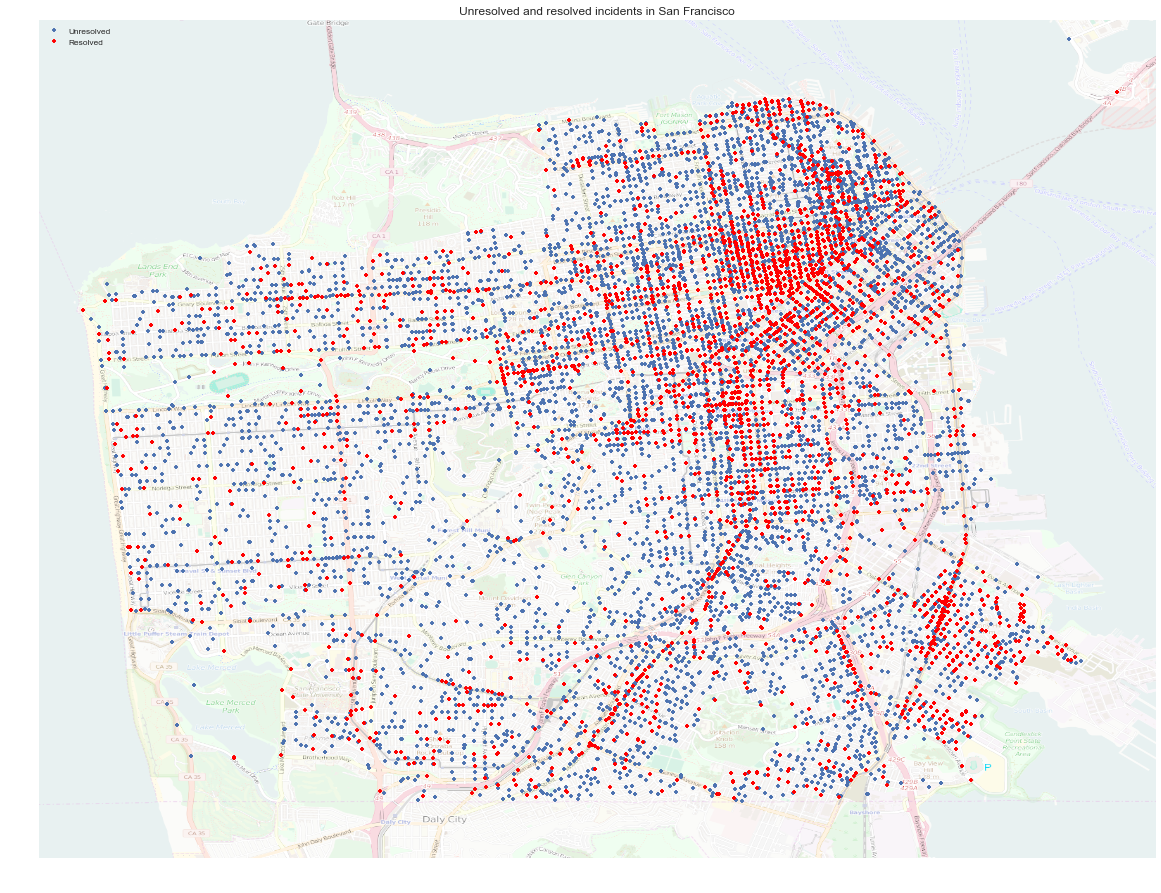

In [7]:
# Map from Open street map
# Location: -122.518,37.7062,-122.3606,37.8185

plt.rcParams["figure.figsize"] = [20,20]

X1 = df.loc[(df['ResolutionFound'] == 0)]['X']
y1 = df.loc[(df['ResolutionFound'] == 0)]['Y']
plt.plot(X1, y1, '.', zorder=1, label='Unresolved', markersize=8)

X2 = df.loc[(df['ResolutionFound'] == 1)]['X']
y2 = df.loc[(df['ResolutionFound'] == 1)]['Y']
plt.plot(X2, y2, 'r.', zorder=2, label='Resolved', markersize=8)

im = plt.imread('map_sf.png')
implot = plt.imshow(im, zorder=0, extent=[-122.52, -122.3602, 37.7, 37.82])

plt.grid(False)
plt.axis('off')
plt.title('Unresolved and resolved incidents in San Francisco')
plt.legend(loc=2, fontsize='small')

### Plotting all incidents over San Francisco by category

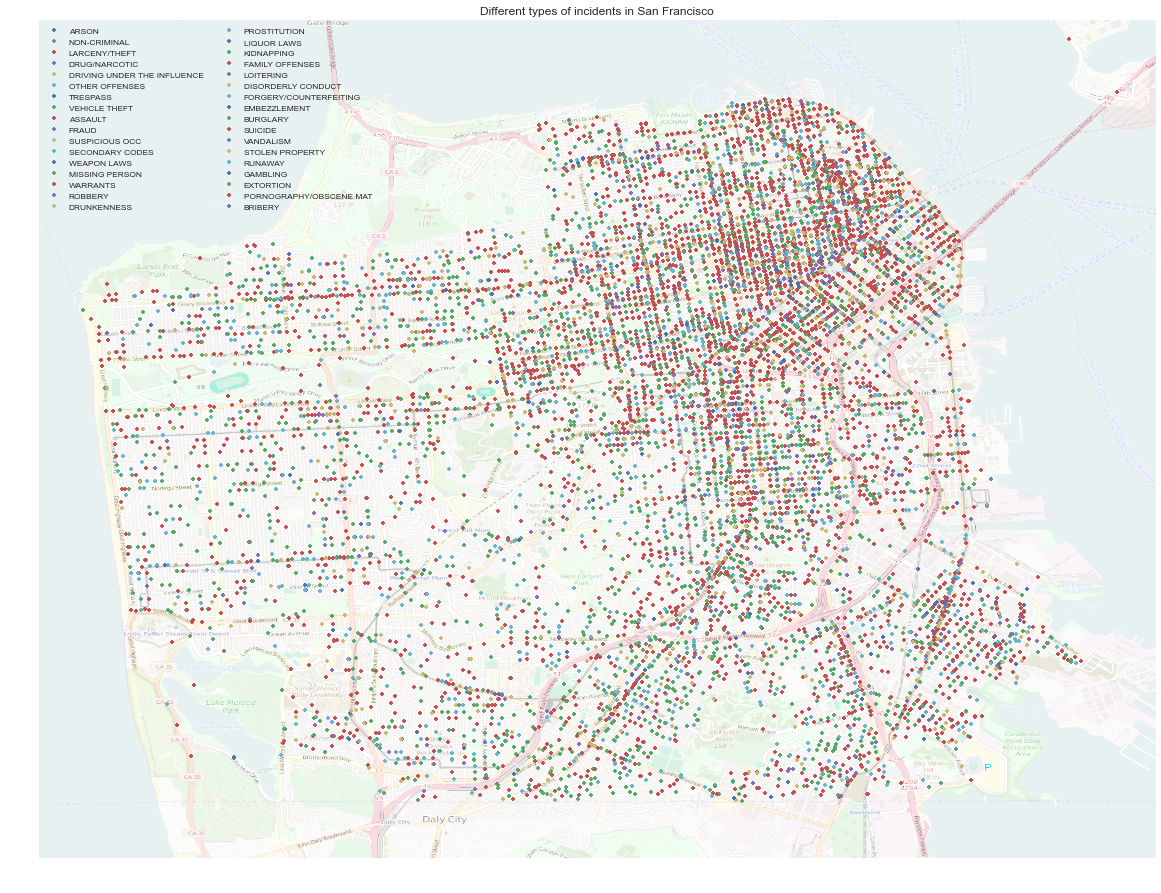

In [8]:
plt.rcParams["figure.figsize"] = [20,20]

for cat in df['Category'].unique():
    X = df.loc[(df['Category'] == cat)]['X']
    y = df.loc[(df['Category'] == cat)]['Y']
    plt.plot(X, y, '.', label=cat, markersize=8)

im = plt.imread('map_sf.png')
implot = plt.imshow(im, zorder=0, extent=[-122.52, -122.3602, 37.7, 37.82])

plt.grid(False)
plt.axis('off')
plt.title('Different types of incidents in San Francisco')
plt.legend(loc=2, ncol=2, fontsize='small')

### Districts

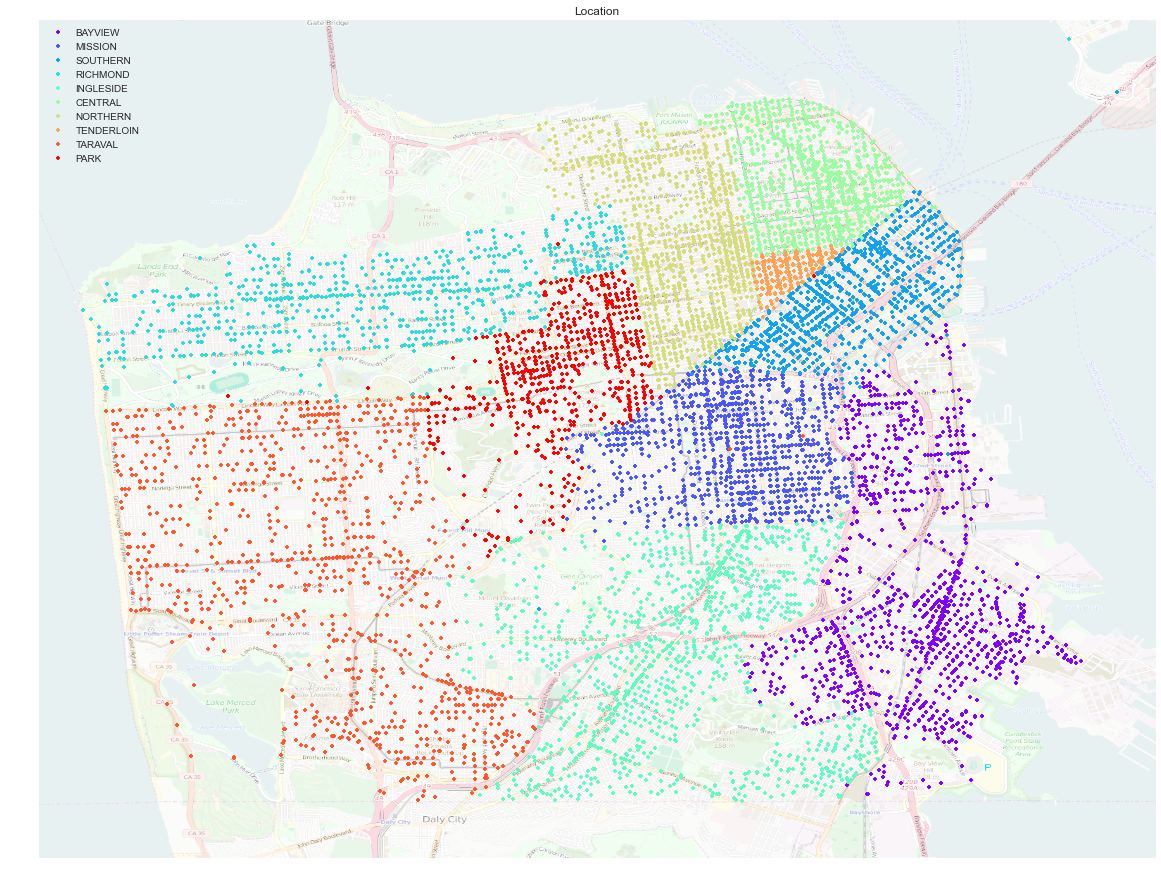

In [9]:
plt.rcParams["figure.figsize"] = [20,20]

color=iter(cm.rainbow(np.linspace(0,1,10)))

for dis in df['PdDistrict'].unique():
    X = df.loc[(df['PdDistrict'] == dis)]['X']
    y = df.loc[(df['PdDistrict'] == dis)]['Y']
    c=next(color)
    plt.plot(X, y, '.', label=dis, markersize=8, c=c)

im = plt.imread('map_sf.png')
implot = plt.imshow(im, zorder=0, extent=[-122.52, -122.3602, 37.7, 37.82])

plt.grid(False)
plt.axis('off')
plt.title('Location')
plt.legend(loc=2)

This is map of San Francisco to get a feeling about how big the districts are, without having to look it up on the internet.

Tenderloin seems to be the smallest district. Bayview, Taraval and Inglesideis are the biggest districts in area.

### Incidents per District

Lets look at how many incidents there are per destrict

In [10]:
df_district = pd.DataFrame(df.groupby('PdDistrict')['ResolutionFound'].sum())

In [11]:
df_district['Incidents'] = pd.DataFrame(df.groupby('PdDistrict')['IncidntNum'].count())

In [12]:
df_district = df_district.sort_values('Incidents')

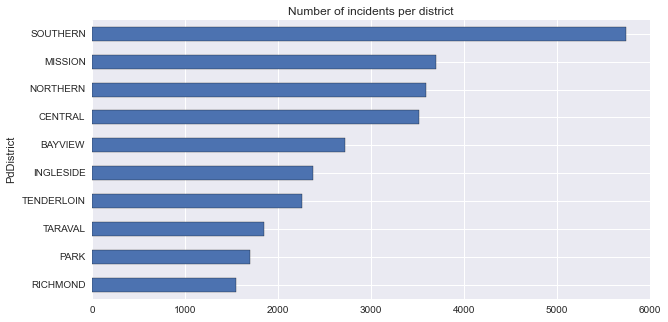

In [13]:
df_district['Incidents'].plot(kind='barh', figsize=[10,5], title='Number of incidents per district')

It looks like Southern district has the most incidents, followed by Mission and Northern district. The district with the least incidents is Richmond.

### Percentage of resolved incidents per district

In [14]:
df_district['ResolutionPercentage'] = (df_district['ResolutionFound'] / df_district['Incidents']) * 100

In [15]:
df_district['ResolutionPercentage']

PdDistrict
RICHMOND      26.326003
PARK          33.313644
TARAVAL       26.551538
TENDERLOIN    51.351351
INGLESIDE     31.034483
BAYVIEW       42.935780
CENTRAL       26.501566
NORTHERN      27.417108
MISSION       42.648649
SOUTHERN      31.904513
Name: ResolutionPercentage, dtype: float64

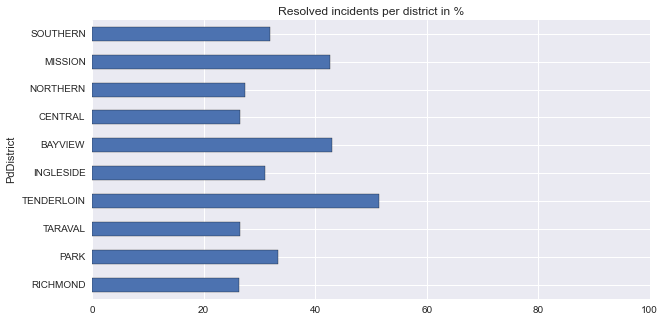

In [16]:
df_district['ResolutionPercentage'].plot(kind='barh', xlim=[0,100], figsize=[10,5], title='Resolved incidents per district in %')

Central has the least resolved incidents per total incidents (26.50%), Tenderloin does the best job (51.35%). 

If I look at this data, Tenderloin is not the place to deal drugs or steel cars.

### Types of incidents

Lets look at different type of incidents and see which ones get solved the most. I will be looking at categories with at least 100 incidents.

In [17]:
df_cat = pd.DataFrame(df.groupby(['Category'])['ResolutionFound'].sum())

In [18]:
df_cat['Incidents'] = pd.DataFrame(df.groupby(['Category'])['IncidntNum'].count())

In [19]:
df_cat['ResolutionPercentage'] = (df_cat['ResolutionFound'] / df_cat['Incidents']) * 100

In [20]:
df_cat = df_cat.sort_values('ResolutionPercentage')

In [21]:
df_cat.loc[df_cat['Incidents'] > 100]['ResolutionPercentage'].sort_values(ascending=False)

Category
WARRANTS           92.592593
DRUG/NARCOTIC      91.524164
PROSTITUTION       91.071429
DRUNKENNESS        82.312925
MISSING PERSON     77.488152
WEAPON LAWS        74.576271
OTHER OFFENSES     60.891505
TRESPASS           59.430605
KIDNAPPING         51.282051
SECONDARY CODES    43.438914
ASSAULT            40.770298
FRAUD              32.231405
ROBBERY            23.051948
NON-CRIMINAL       16.506781
SUSPICIOUS OCC     13.307692
VEHICLE THEFT       6.714140
LARCENY/THEFT       5.641242
Name: ResolutionPercentage, dtype: float64

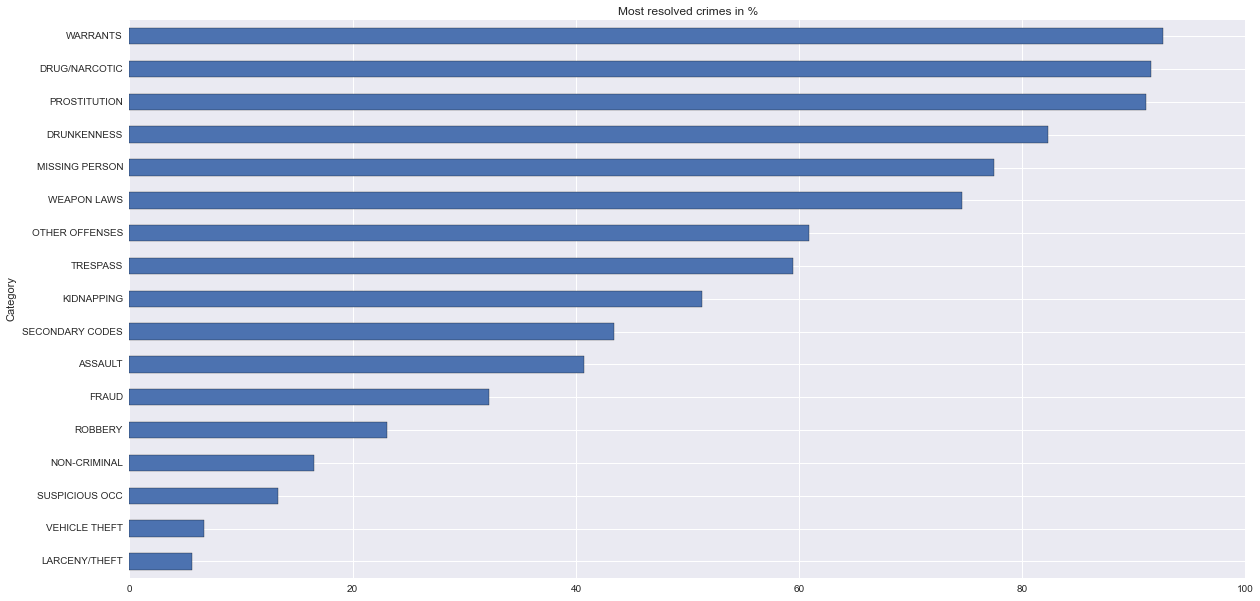

In [22]:
df_cat.loc[df_cat['Incidents'] > 100]['ResolutionPercentage'].plot(kind='barh', figsize=[20,10], title='Most resolved crimes in %')

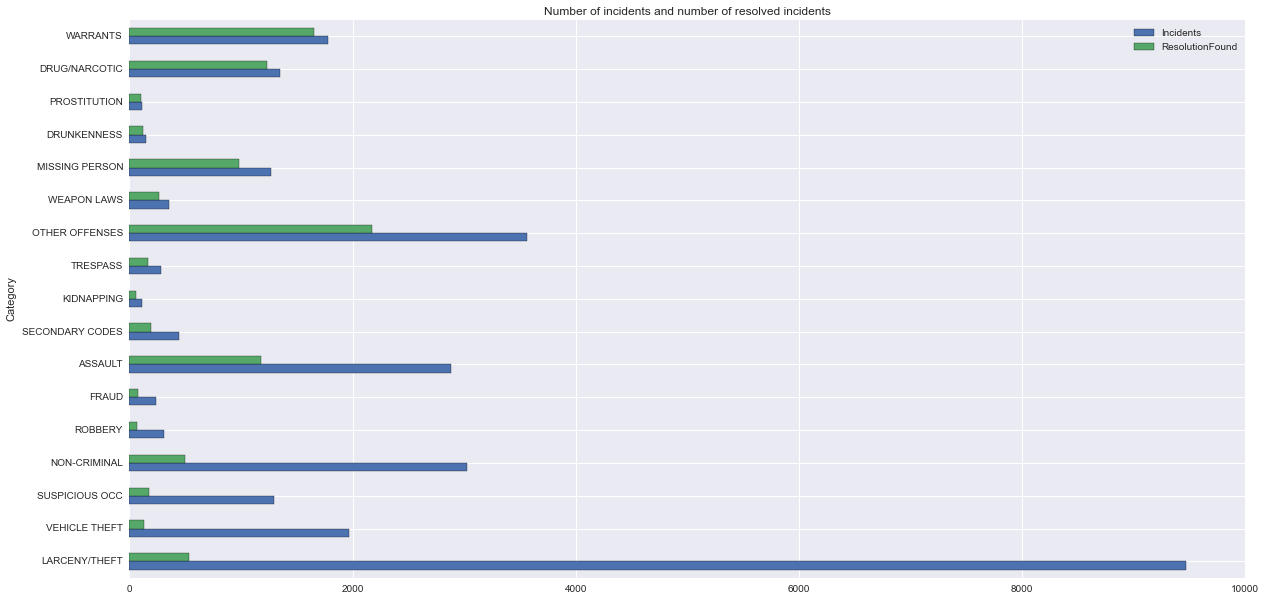

In [23]:
df_cat.loc[df_cat['Incidents'] > 100][['Incidents', 'ResolutionFound']].plot(kind='barh', figsize=[20,10], title='Number of incidents and number of resolved incidents')

Warrants (92.59%) and Drug/narcotic (91.52) related incidents get solved relatively the most. It's best that lock your car and hide your stuff, because a lot of criminals get away with Vehicle theft (6.71%) and Larceny/theft (5.64) in San Francisco.

Looking at this data, a criminal should choose Vehicle theft above Drug related incidents to make some money.

### Difference DRUG/NARCOTIC vs VEHECLE THEFT

I want to see what the differences are between Drug and Vehecle theft incidents. They both have more than 1000 incidents, but Drug incidents have a very high 'resolution rate', Vehicle theft not.

When is the best time to commit one of these crimes?

In [24]:
df_drugs = df.loc[df['Category'] == 'DRUG/NARCOTIC']
df_theft = df.loc[df['Category'] == 'VEHICLE THEFT']

In [25]:
df_drugs = df_drugs.set_index('DateTime')
df_theft = df_theft.set_index('DateTime')

In [26]:
df_drugs_time = df_drugs.groupby( [df_drugs.index.hour] )['IncidntNum'].count()
df_theft_time = df_theft.groupby( [df_theft.index.hour] )['IncidntNum'].count()

df_drugs_time_resolved = df_drugs.groupby( [df_drugs.index.hour] )['ResolutionFound'].sum()
df_theft_time_resolved = df_theft.groupby( [df_theft.index.hour] )['ResolutionFound'].sum()

In [27]:
df_drugs_theft_time = pd.DataFrame(df_drugs_time)
df_drugs_theft_time.columns = ['Drugs']
df_drugs_theft_time['Theft'] = df_theft_time

df_drugs_theft_time['DrugsResolved'] = df_drugs_time_resolved
df_drugs_theft_time['TheftResolved'] = df_theft_time_resolved

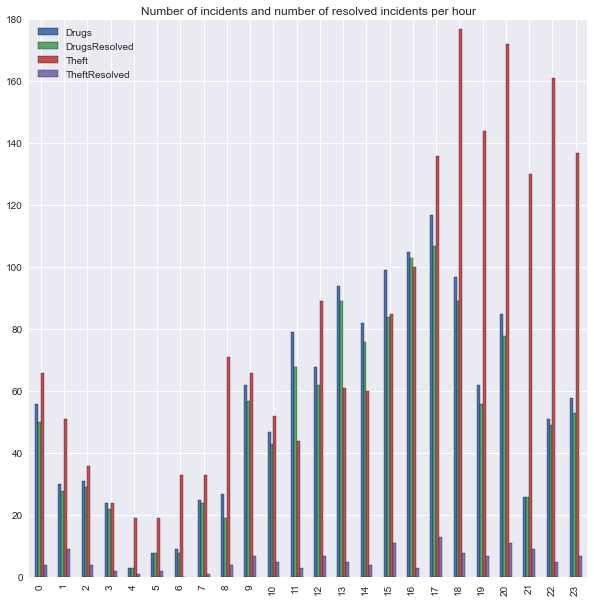

In [28]:
df_drugs_theft_time[['Drugs', 'DrugsResolved', 'Theft', 'TheftResolved']].plot(kind='bar', 
                                                                               figsize=[10,10],
                                                                               title='Number of incidents and number of resolved incidents per hour')

Because there are more thefts, it is hard to compare them. Lets scale them down.

### Scaled Drugs and Theft

In [29]:
df_drugs_theft_time['DrugsScaled'] = df_drugs_theft_time['Drugs'] / df_drugs_theft_time['Drugs'].sum() * 100
df_drugs_theft_time['TheftScaled'] = df_drugs_theft_time['Theft'] / df_drugs_theft_time['Theft'].sum() * 100

df_drugs_theft_time['DrugsResolvedScaled'] = df_drugs_theft_time['DrugsScaled'] * df_drugs_theft_time['DrugsResolved'] / df_drugs_theft_time['Drugs']
df_drugs_theft_time['TheftResolvedScaled'] = df_drugs_theft_time['TheftScaled'] * df_drugs_theft_time['TheftResolved'] / df_drugs_theft_time['Theft']

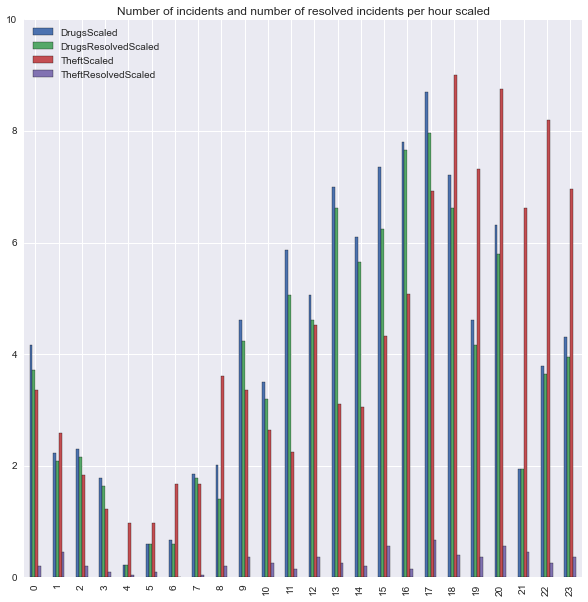

In [30]:
df_drugs_theft_time[['DrugsScaled', 'DrugsResolvedScaled', 'TheftScaled', 'TheftResolvedScaled']].plot(kind='bar', 
                                                                                                       figsize=[10,10],
                                                                                                       title='Number of incidents and number of resolved incidents per hour scaled')

Apparently, there are a lot of drug incidents between 1PM and 5PM, Vehicle theft between 6PM and 11PM. About 9% of all Drug related incidents take place around 5PM and almost 8% of those crimes get solved.

In [31]:
df_drugs_theft_time['DrugsResolvedPerc'] = df_drugs_theft_time['DrugsResolved'] / df_drugs_theft_time['Drugs'] * 100
df_drugs_theft_time['TheftResolvedPerc'] = df_drugs_theft_time['TheftResolved'] / df_drugs_theft_time['Theft'] * 100

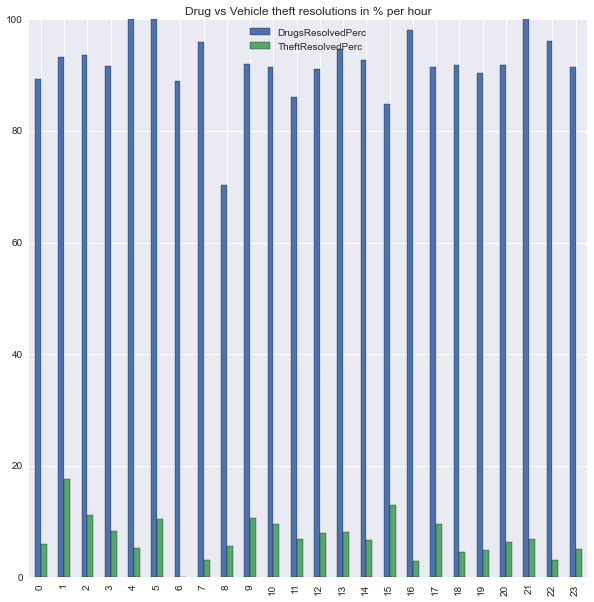

In [32]:
df_drugs_theft_time[['DrugsResolvedPerc', 'TheftResolvedPerc']].plot(kind='bar', 
                                                                     figsize=[10,10],
                                                                     title='Drug vs Vehicle theft resolutions in % per hour')

Drug related incidents at 4AM, 5AM and 9PM are all resolved. At 8AM the cops have their 'worst' drug resolve capabilities.

Doing a Vehicle theft around 6 in the morning could be a good idea for the criminals, because there has not been one Vehicle theft incident that took place around 6AM that has been resolved.

### Vehicle theft resolution per district

In [33]:
df_theft_district_incidents = df_theft.groupby('PdDistrict')['IncidntNum'].count()
df_theft_district_incidents_resolved = df_theft.groupby('PdDistrict')['ResolutionFound'].sum()

In [34]:
df_theft_district = pd.DataFrame(df_theft_district_incidents)
df_theft_district.columns = ['Incidents']
df_theft_district['Resolved'] = df_theft_district_incidents_resolved

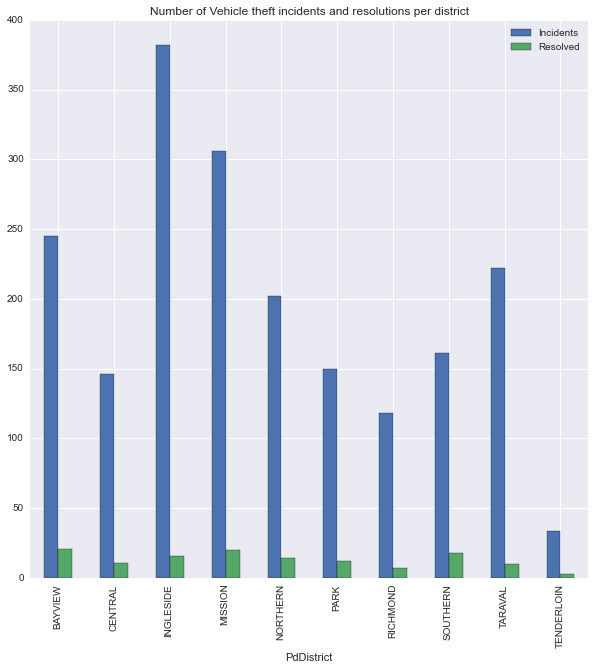

In [35]:
df_theft_district.plot(kind='bar', figsize=[10,10], title='Number of Vehicle theft incidents and resolutions per district')

In [36]:
df_theft_district['ResolvedPerc'] = df_theft_district['Resolved'] / df_theft_district['Incidents'] * 100

In [37]:
df_theft_district

Incidents  Resolved  ResolvedPerc
PdDistrict                                   
BAYVIEW           245        21      8.571429
CENTRAL           146        11      7.534247
INGLESIDE         382        16      4.188482
MISSION           306        20      6.535948
NORTHERN          202        14      6.930693
PARK              150        12      8.000000
RICHMOND          118         7      5.932203
SOUTHERN          161        18     11.180124
TARAVAL           222        10      4.504505
TENDERLOIN         34         3      8.823529

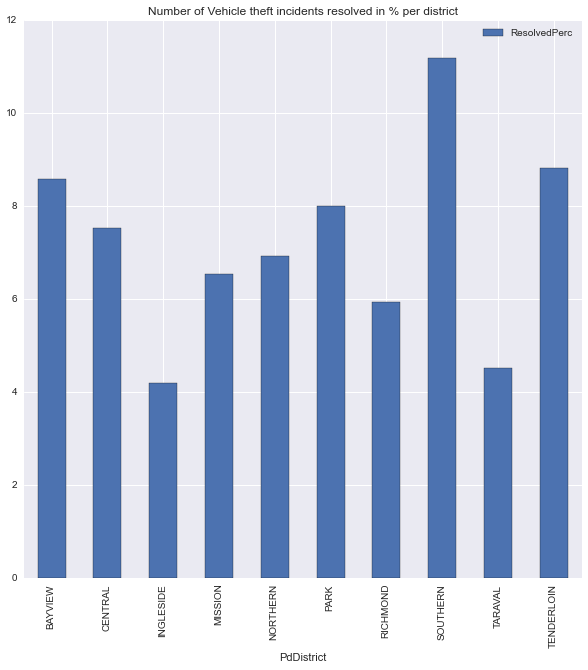

In [38]:
df_theft_district[['ResolvedPerc']].plot(kind='bar', figsize=[10,10], title='Number of Vehicle theft incidents resolved in % per district')

Southern is best at resolving Vehicle theft incidents, Ingleside does the worst job and only solves 4.19% of all Vehicle theft incidents.

### Vehicle theft in Ingleside per hour

Conclusion is that steeling a vehicle in Ingleside does not get solved a lot. One last thing I want to check is if there is a specific place and time that would be optimal for a criminal to steal a Vehicle.

In [39]:
df_theft_ingleside = df.loc[(df['Category'] == 'VEHICLE THEFT') & (df['PdDistrict'] == 'INGLESIDE')]

In [40]:
df_theft_ingleside = df_theft_ingleside.set_index('DateTime')

In [41]:
df_theft_ingleside_time = df_theft_ingleside.groupby( [df_theft_ingleside.index.hour] )['IncidntNum'].count()
df_theft_ingleside_time_resolved = df_theft_ingleside.groupby( [df_theft_ingleside.index.hour] )['ResolutionFound'].sum()

In [42]:
df_theft_ingleside_time = pd.DataFrame(df_theft_ingleside_time)
df_theft_ingleside_time.columns = ['Incidents']
df_theft_ingleside_time['Resolved'] = df_theft_ingleside_time_resolved

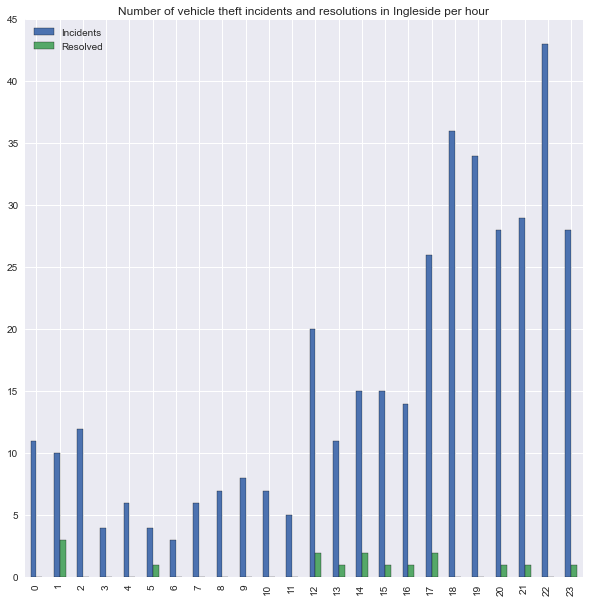

In [43]:
df_theft_ingleside_time.plot(kind='bar', figsize=[10,10], title='Number of vehicle theft incidents and resolutions in Ingleside per hour')

Maybe there is not enough data to suggest a specific time to steal a car, but it looks like the cops are busy doing other things around 10PM than arresting Vehicle theft criminals. That time there are a lot of thefts, but not one has been resolved.

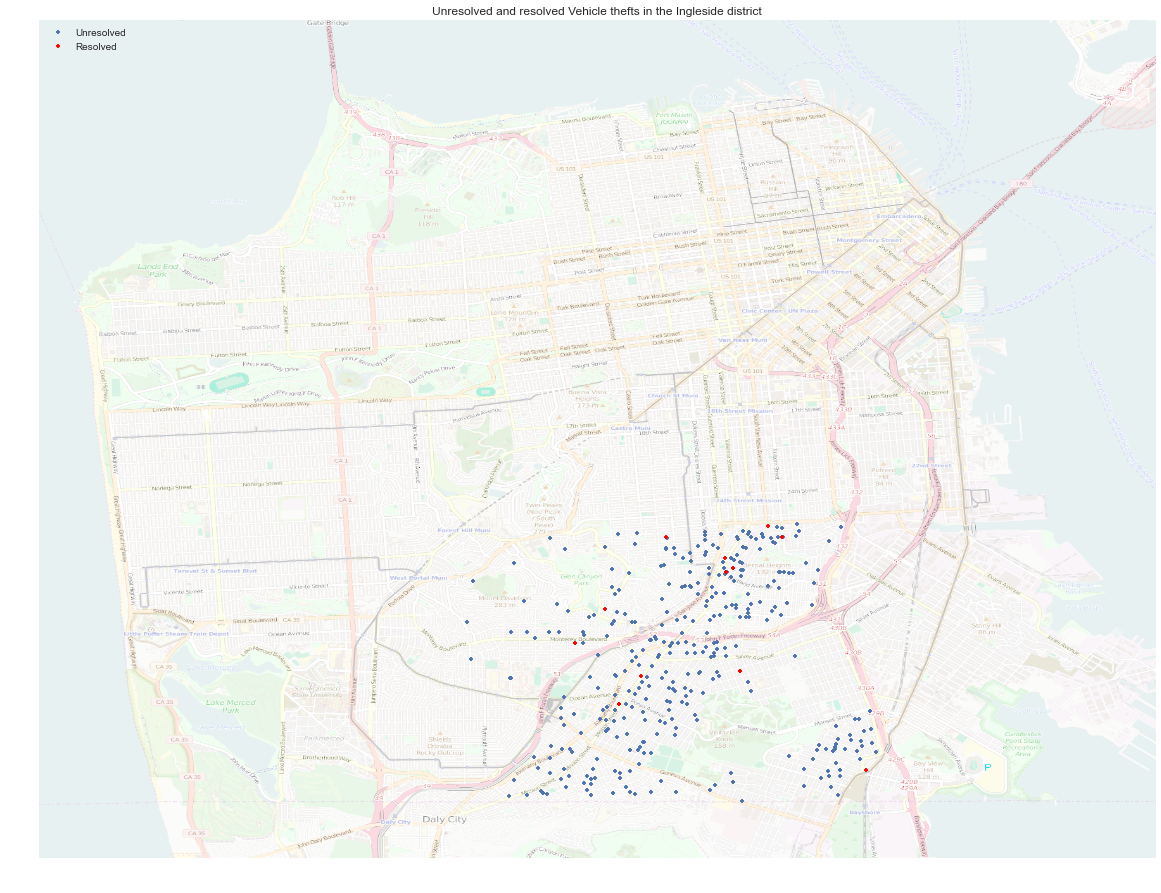

In [44]:
plt.rcParams["figure.figsize"] = [20,20]

X1 = df_theft_ingleside.loc[(df_theft_ingleside['ResolutionFound'] == 0)]['X']
y1 = df_theft_ingleside.loc[(df_theft_ingleside['ResolutionFound'] == 0)]['Y']
plt.plot(X1, y1, '.', zorder=1, label='Unresolved', markersize=8)

X2 = df_theft_ingleside.loc[(df_theft_ingleside['ResolutionFound'] == 1)]['X']
y2 = df_theft_ingleside.loc[(df_theft_ingleside['ResolutionFound'] == 1)]['Y']
plt.plot(X2, y2, 'r.', zorder=2, label='Resolved', markersize=8)

im = plt.imread('map_sf.png')
implot = plt.imshow(im, zorder=0, extent=[-122.52, -122.3602, 37.7, 37.82])

plt.grid(False)
plt.axis('off')
plt.title('Unresolved and resolved Vehicle thefts in the Ingleside district')
plt.legend(loc=2)

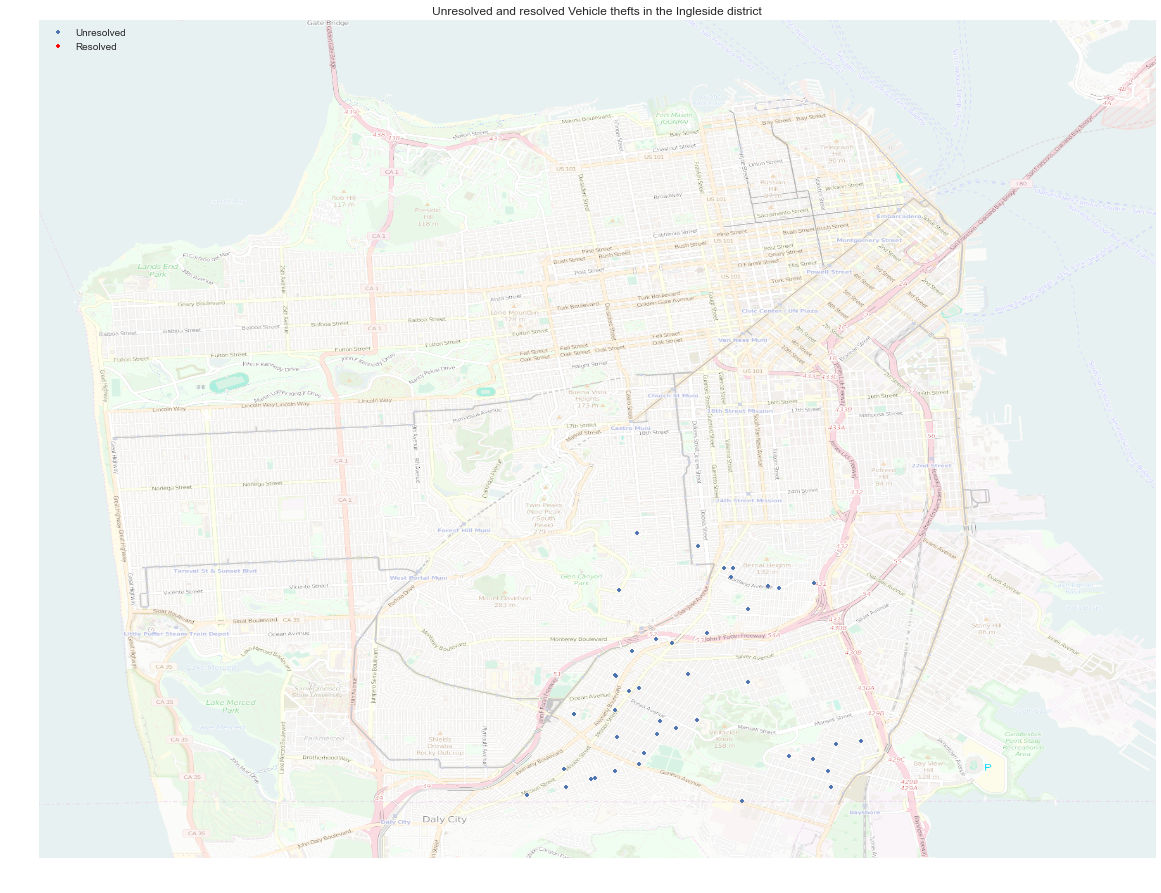

In [45]:
plt.rcParams["figure.figsize"] = [20,20]

X1 = df_theft_ingleside.loc[(df_theft_ingleside['ResolutionFound'] == 0)].between_time('22:00','22:59')['X']
y1 = df_theft_ingleside.loc[(df_theft_ingleside['ResolutionFound'] == 0)].between_time('22:00','22:59')['Y']
plt.plot(X1, y1, '.', zorder=1, label='Unresolved', markersize=8)

X2 = df_theft_ingleside.loc[(df_theft_ingleside['ResolutionFound'] == 1)].between_time('22:00','22:59')['X']
y2 = df_theft_ingleside.loc[(df_theft_ingleside['ResolutionFound'] == 1)].between_time('22:00','22:59')['Y']
plt.plot(X2, y2, 'r.', zorder=2, label='Resolved', markersize=8)

im = plt.imread('map_sf.png')
implot = plt.imshow(im, zorder=0, extent=[-122.52, -122.3602, 37.7, 37.82])

plt.grid(False)
plt.axis('off')
plt.title('Unresolved and resolved Vehicle thefts in the Ingleside district')
plt.legend(loc=2)

There does not seem to be a specific place to steal a car and get away with it in Ingleside.

### To answer my question

I think a criminal can use this data to see that dealing drugs in San Francisco is not a good idea, but stealing cars could be very profittable. They could also conclude that Ingleside and Taraval are the best places to steal a vehicle and if he would steal one in Ingleside, 10PM seems to be a good time (among others).

---